¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

 <font size="5"> **Descripción del proyecto:** </font>

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

  **Table of contents**<a id='toc0_'></a>
    - [Importación de librerias](#toc1_)
    - [Carga de datos](#toc2_)
    - [Exploración de datos](#toc3_)
    - [Paso 2. Prepara los datos](#toc4_)
    - [Paso 3. Analiza datos](#toc5_)
    - [Paso 4. Crea un perfil de usuario para cada región](#toc6_)
    - [Paso 5. Prueba las siguientes hipótesis](#toc7_)
    - [Paso 6. Escribe una conclusión general](#toc8_)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Hola, Javier! Excelente trabajo con la tabla de contenidos, ayuda a guiar los pasos que vas a seguir en el análisis de la información.  Solamente recuerda que otros elementos son la introducción, objetivo del análisis. Esto es crucial para cualquier proyecto, ya que establece una guía clara sobre los pasos a seguir. Tener estos elementos bien definidos desde el principio nos permite trabajar de manera más organizada y eficiente. 
</div>

# <a id='toc1_'></a>[Importación de librerias](#toc1_)

In [1]:
# Primero necesitamos cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

# <a id='toc2_'></a>[Carga de datos](#toc2_)

In [2]:
#Vamos a cargar nuestros datos en un DF"
df_games = pd.read_csv("/datasets/games.csv")


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

# <a id='toc3_'></a>[Exploración de datos](#toc3_)

In [3]:
df_games.info()
print()
print(df_games.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart

Tenemos una tabla con 16715 filas y 11 columnas.
A continuación detallo los diferentes datos con los que contamos:

— **Name**: (Nombre)

— **Platform**: (Plataforma)

— **Year_of_Release**: (Año de lanzamiento)

— **Genre**: (Género) 

— **NA_sales**: (ventas en Norteamérica en millones de dólares estadounidenses) 

— **EU_sales**: (ventas en Europa en millones de dólares estadounidenses) 

— **JP_sales**: (ventas en Japón en millones de dólares estadounidenses) 

— **Other_sales**: (ventas en otros países en millones de dólares estadounidenses) 

— **Critic_Score**: Nota que se obtuvo de los criticos (máximo de 100) 

— **User_Score**: Nota que se obtuvo de los clientes o usuarios (máximo de 10) 

— **Rating**: Clasificación de edad del juego otorgada (ESRB)

En esta pequeña exploración de datos podemos observar que algunas columnas como: "Platform, Year_of_Release, Genre, Critic_Score, User_Score y Rating". Combinan mayusculas y minusculas en su nombre, lo cual necesitamos corregir.

Ademas, los tipos de datos son incorrectos en algunas columnas como "Year_of_Release", que tiene un tipo de dato float64 cuando deberia de ser int. A partir de ahora realizaremos las diferentes correcciones adecuadas para poder analizarlos y trabajar con estos datos de manera adecuada y correcta.


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Excelente trabajo con el uso de info() para mostrar la información general de la base de datos, esto es fundamente siempre al inicio del análisis porque te da un panorama general. 

</div>

# <a id='toc4_'></a>[Paso 2. Prepara los datos](#toc4_)
- Reemplaza los nombres de las columnas (ponlos en minúsculas).
- Convierte los datos en los tipos necesarios.
- Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.
- Si es necesario, elige la manera de tratar los valores ausentes:
    * Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
    * ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
    * Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.
- Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [4]:
#A continuación vamos a transformar los nombres de las columnas a minusculas
df_games.columns = df_games.columns.str.lower()
print(df_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')



<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Como aprendiste en los primeros cursos, el uso de la función lower() es muy útil cuando hacemos la limpieza de los nombres de las variables y de variables

</div>

In [5]:
# Vamos a aplicar un describe para ver a mas detalle los datos con los que disponemos.
df_games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
# Antes de continuar, buscaremos valores duplicados
datos_duplicados = df_games.duplicated().sum()
print(f'Las filas duplicadas son: {datos_duplicados}')

Las filas duplicadas son: 0


<div class="alert alert-block alert-success">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Como aprendiste en cursos anteriores, el análisis de registros duplicados es esencial en el análisis de datos para evitar que sesguen nuestros resultados.
</div>

In [7]:
# Vamos a buscar valores ausentes o nulos en nuestro DF
datos_nulos = df_games.isna().sum()
print(f'Los valores nulos son \n{datos_nulos}')

Los valores nulos son 
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Como podemos observar, existen valores ausentes en 4 columnas: **"name, year_of_release, critic_score y user_score".**

Vamos a rellenar esos valores ausentes con "Unknown" de esta manera no quedara vacio el espacio y podremos hacer analisis a mayor detalle sin que influya mucho en los resultados.

In [8]:
# A continuación vamos a rellenar esos valores ausentes por la palabra "Unknown".
df_games["name"].fillna("name unknown", inplace=True)
df_games["genre"].fillna("genre unknown", inplace=True)

In [9]:
# Cambiaremos el tipo de datos de "year_of_release a int"
df_games["year_of_release"] = df_games["year_of_release"].fillna(0).astype("int")

<div class="alert alert-block alert-info">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
En ocasiones podemos completar los valores faltantes con información con proxys. Por ejemplo en este caso los podríamos completar con los años de lanzamientos de los juegos en otras plataformas
</div>

In [10]:
# Nos damos cuenta que "user_score" es un tipo de dato object y ademas cuenta con valores tbd, asi que los vamos a reemplazar por NaN.
df_games["user_score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
df_games["user_score"].replace("tbd", np.nan, inplace=True)
df_games["user_score"] = df_games["user_score"].astype("float")

In [12]:
df_games["user_score"].isna().sum()

9125

In [13]:
# Aqui podemos observar que los cambios realizados anteriormente fueron ejecutados con exito.
df_games["user_score"].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

Se decidio corregir la abreviatura tbd ya que es un termino no muy comun y es facil de malinterpretar. Ademas esta abarcando un espacio en donde lo recomendable es que se encuentre ausente para que no influya en los analisis que realizaremos más adelante.

In [14]:
# Rellenamos los valores ausentes de "rating"
df_games["rating"].fillna("rating unknown", inplace=True)

In [15]:
# Aqui podemos apreciar que realizamos todos los cambios exitosamente en las diferentes columnas y valores.
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [16]:
# Ahora vamos a calcular las ventas totales (la suma de las ventas en todas las regiones)
df_games["venta_total"] = df_games[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum(axis=1)

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de dos de las variables de la base de datos y muy buen trabajo con la suma de todas las ventas. 
    
   

</div>

<div class="alert alert-block alert-danger">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo, Javier! Solamente para terminar de complementar el análisis te recomiendo verificar si las variables de score de crititicos y ususarios  se deben de hacer algún ajuste. Por ejemplo completar los valores nulos con la mediana dado que estamos trabajando con distribuciones sesgadas
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Javier. gra trabajo completando los valores nulos de las variables de score
</div>

In [17]:
# Por comentarios del revisor, sacamos el describe de la columna "user_score" para saber el promedio y rellenar los datos ausentes
df_games["user_score"].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [18]:
# Por comentarios del revisor, sacamos el describe de la columna "critic_score" para saber el promedio y rellenar los datos ausentes
df_games["critic_score"].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [19]:
# Sustituimos los valores ausentes por los valores promedios de cada columna y ejecutamos
df_games["user_score"].fillna(7, inplace=True)
df_games["critic_score"].fillna(68, inplace=True)

In [20]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,venta_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.0,7.0,rating unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.0,7.0,rating unknown,31.38


In [21]:
# Una vez teniendo las ventas totales, vamos a revisar cual es top 5 de juegos más vendidos en el mundo.
top_5_videogames = df_games.nlargest(5, ["venta_total"])

In [22]:
top_5_videogames

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,venta_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.0,7.0,rating unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.0,7.0,rating unknown,31.38


Como podemos apreciar el Top 5 esta compuesto de la siguiente manera:

**TOP:**
    1.Wii Sports
    2.Super Mario Bros.
    3.Mario Kart Wii
    4.Wii Sports Resort
    5.Pokemon Red/Pokemon Blue

# <a id='toc5_'></a>[Paso 3. Analiza datos](#toc5_)
* Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

* Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

* Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

* Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores. ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

* Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

* Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

* Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas. 

* Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [23]:
# A continuación, vamos a crear una nueva tabla en donde vamos a identificar cuantos juegos fueron lanzados en diferentes años.
number_of_games_by_year = df_games.groupby("year_of_release")["name"].count().sort_values(ascending=False).reset_index()

In [24]:
number_of_games_by_year.columns = ["año_de_lanzamiento", "cantidad_de_videojuegos"]

In [25]:
number_of_games_by_year.query("año_de_lanzamiento !=0", inplace=True)

In [26]:
number_of_games_by_year

,año_de_lanzamiento,cantidad_de_videojuegos
0,2008,1427
1,2009,1426
2,2010,1255
3,2007,1197
4,2011,1136
5,2006,1006
6,2005,939
7,2002,829
8,2003,775
9,2004,762


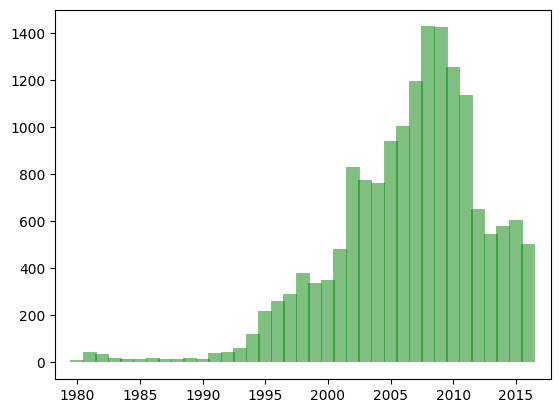

In [27]:
plt.vlines(x=number_of_games_by_year.año_de_lanzamiento, ymin=0, ymax=number_of_games_by_year.cantidad_de_videojuegos, alpha=0.5, linewidth=10, colors="green")
plt.show()

<div class="alert alert-block alert-success">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Muy buen trabajo, la grafica nos da una visión completa sobre los periodos en los que se lanzaron los videojuegos. Esto también nos da una visión sobre el mercado de los videojuegos, es decir los periodos en donde se tenían mayores usuarios
</div>

En este grafico podemos observar a traves de los años la cantidad de ventas de Videojuegos que se ha obtenido, en donde podemos apreciar que entre el 2005 y el 2010 fueron los años de más ventas.

In [28]:
# A continuación vamos a crear una nueva tabla para poder identificar las 5 plataformas con más ventas.
ventas_por_plataforma = df_games.groupby("platform")["venta_total"].sum().sort_values(ascending=False).reset_index()
ventas_por_plataforma.head(5)

,platform,venta_total
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


In [29]:
# Aqui creamos una metrica llamada "Z_score" que nos dice que tanto estan alejados los valores del promedio. 
ventas_por_plataforma["z_score"] = (ventas_por_plataforma["venta_total"] - ventas_por_plataforma["venta_total"].mean())/ventas_por_plataforma["venta_total"].std()

In [30]:
ventas_por_plataforma["color"] = ["red" if puntaje <= 0 else "green" for puntaje in ventas_por_plataforma["z_score"]]

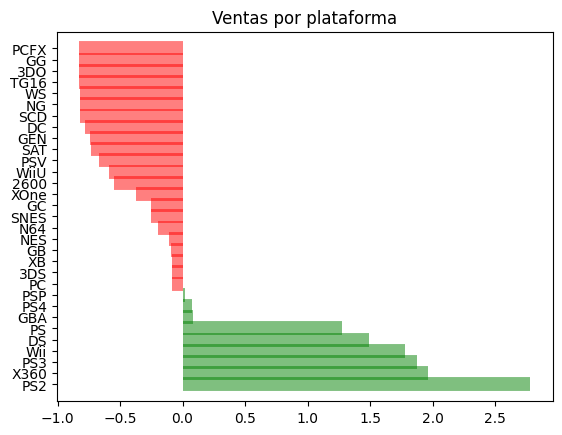

In [31]:
plt.hlines(
    y=ventas_por_plataforma.platform,
    xmin=0,
    xmax=ventas_por_plataforma.z_score,
    color=ventas_por_plataforma.color,
    linewidth=10,
    alpha=0.5,
)
plt.title("Ventas por plataforma")
plt.show()

Este grafico nos indica las plataformas que han estado generando ventas y las que no, de tal manera podemos apreciar cuales son las favoritas de los usuarios y cuales no.

In [32]:
# Ahora vamos a crear una tabla para analizar el tiempo de vida con el que cuenta cada plataforma en base a su venta total
tiempo_de_vida_plataforma = pd.pivot_table(
    df_games,
    index="year_of_release",
    columns="platform",
    values="venta_total",
    aggfunc="sum",
).fillna(0)

In [33]:
tiempo_de_vida_plataforma = tiempo_de_vida_plataforma.iloc[1:,:]

In [34]:
tiempo_de_vida_plataforma

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1981,35.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1982,28.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1983,5.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1985,0.45,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1986,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1987,1.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1988,0.74,0.00,0.00,0.00,0.00,1.43,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [35]:
tiempo_de_vida_plataforma.query("year_of_release >0", inplace=True)

<AxesSubplot:xlabel='year_of_release'>

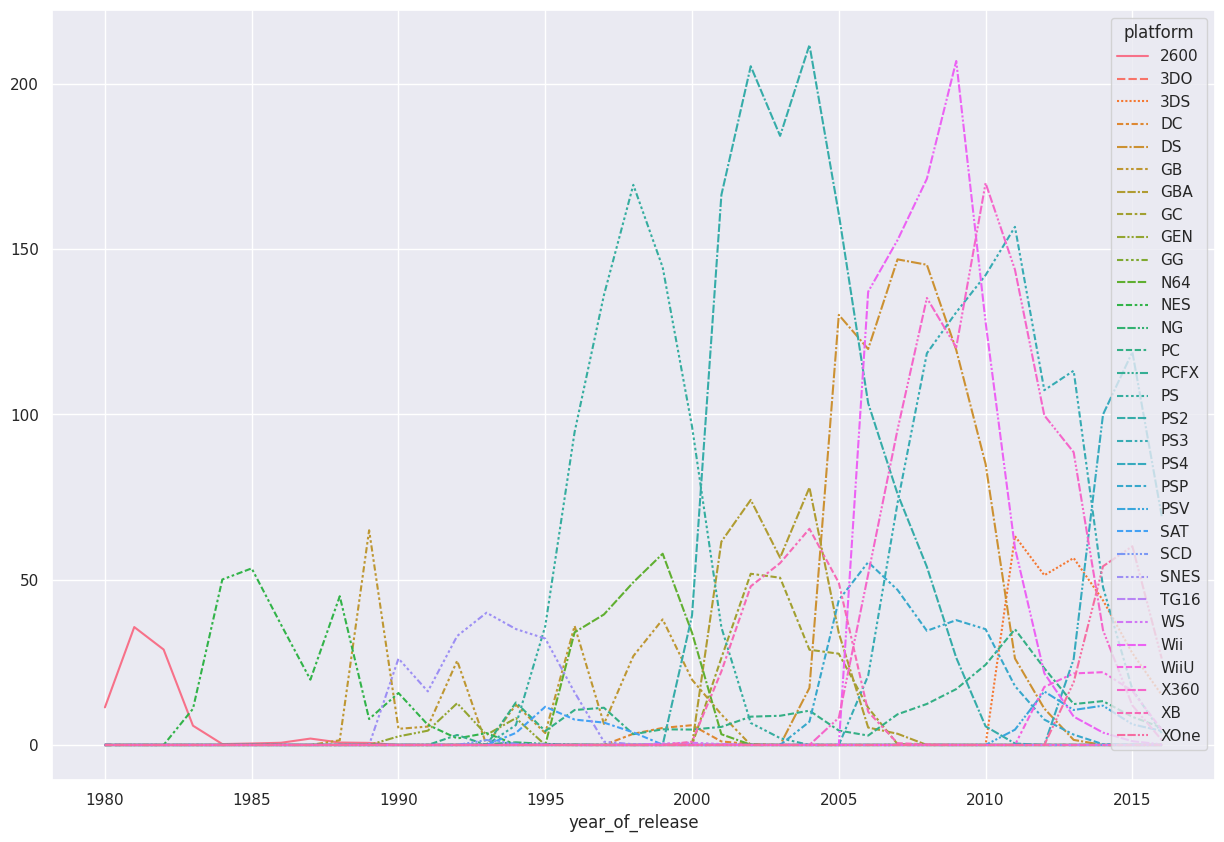

In [36]:
sns.set_theme(rc={"figure.figsize":(15,10)})
sns.lineplot(data=tiempo_de_vida_plataforma)

Este grafico nos ayuda a predecir el tiempo de vida de cada una de las plataformas, esto sirve para poder utilizar un año en concreto para poder predecir los años posteriores.

In [37]:
# A continuación vamos a crear una tabla limpia que nos agarre los datos a partir del año 2012
clean_data = df_games[df_games["year_of_release"]>= 2012]

In [38]:
clean_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,venta_total
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,68.0,7.0,rating unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,68.0,7.0,rating unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,68.0,7.0,rating unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,68.0,7.0,rating unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.0,7.0,rating unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,68.0,7.0,rating unknown,0.01


In [39]:
nuevo_tiempo_de_vida = clean_data.pivot_table(
    index="year_of_release",
    columns="platform",
    values="venta_total",
    aggfunc="sum"
).fillna(0)

<AxesSubplot:xlabel='year_of_release'>

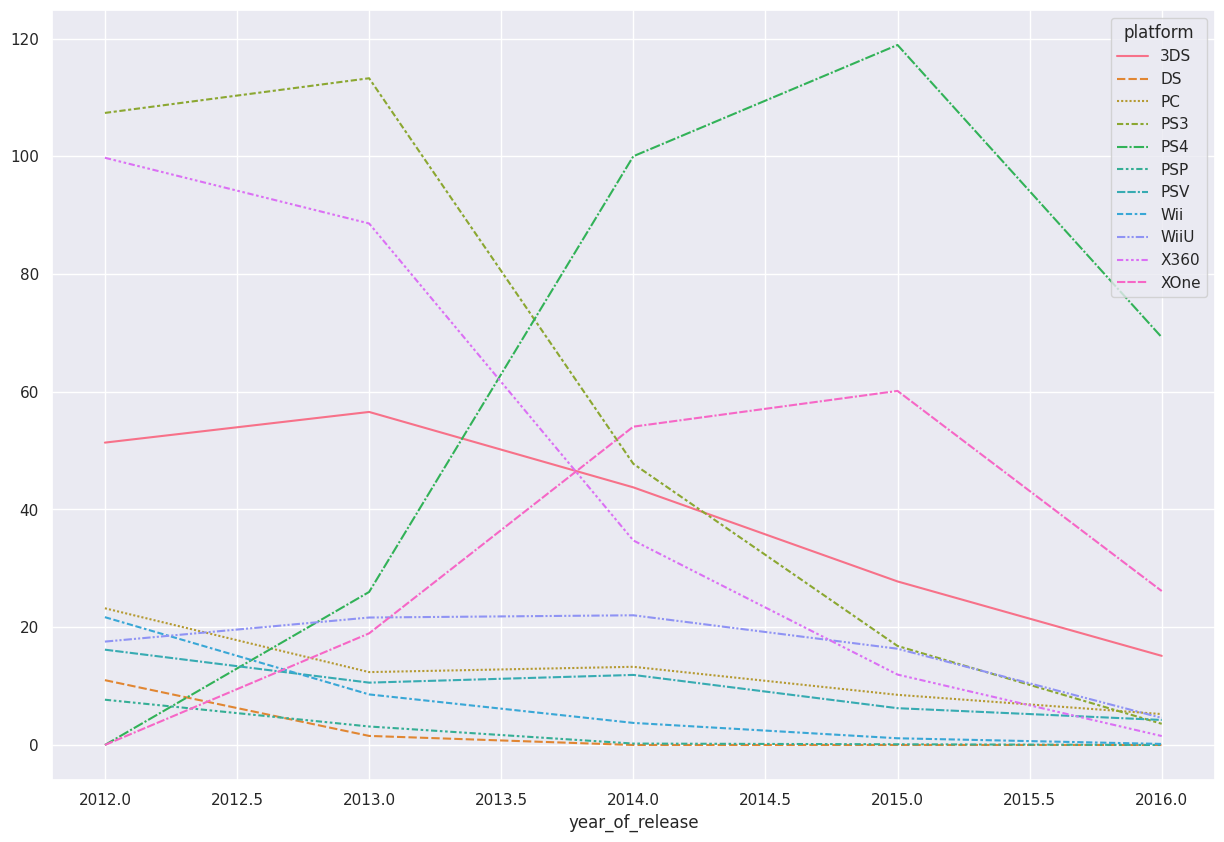

In [40]:
sns.lineplot(data=nuevo_tiempo_de_vida)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Javier! Muy buen trabajo con este análisis, al reducir el periodo a 5 años es posible visualizar los resultados más actualizados  

</div>

En este grafico podemos apreciar como algunas plataformas bajan en ventas dependiendo del año de lanzamiento como otras son lanzadas y se hacen muy famosas y vendidas. En este caso en los años posteriores a 2013 la plataforma de PS4 junto con la Xbox ONE han destacado muchisimo más que las otras.

Ademas, de las plataformas que se reducen son las de Xbox 360 y PS3. En cambio aumentan las plataformas PS4 y Xbox ONE.

In [41]:
box_plot_data = clean_data.groupby(["year_of_release", "platform"]).agg({"venta_total":"sum"}).reset_index()

In [42]:
box_plot_data

,year_of_release,platform,venta_total
0,2012,3DS,51.36
1,2012,DS,11.01
2,2012,PC,23.22
3,2012,PS3,107.36
4,2012,PSP,7.69
5,2012,PSV,16.19
6,2012,Wii,21.71
7,2012,WiiU,17.56
8,2012,X360,99.74
9,2013,3DS,56.57


[Text(0.5, 1.0, 'Distribución del tiempo de vida de las plataformas')]

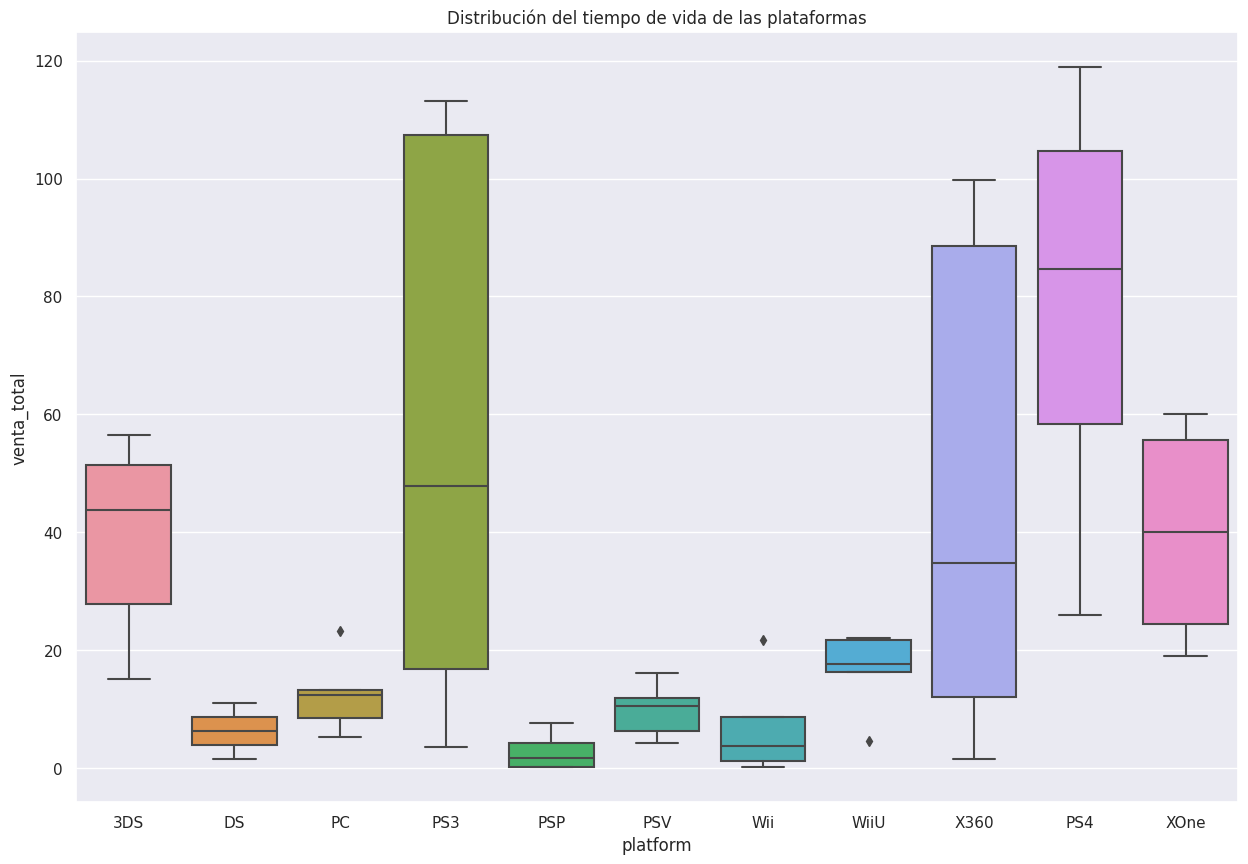

In [43]:
sns.boxplot(x="platform", y="venta_total", data=box_plot_data).set(title="Distribución del tiempo de vida de las plataformas")

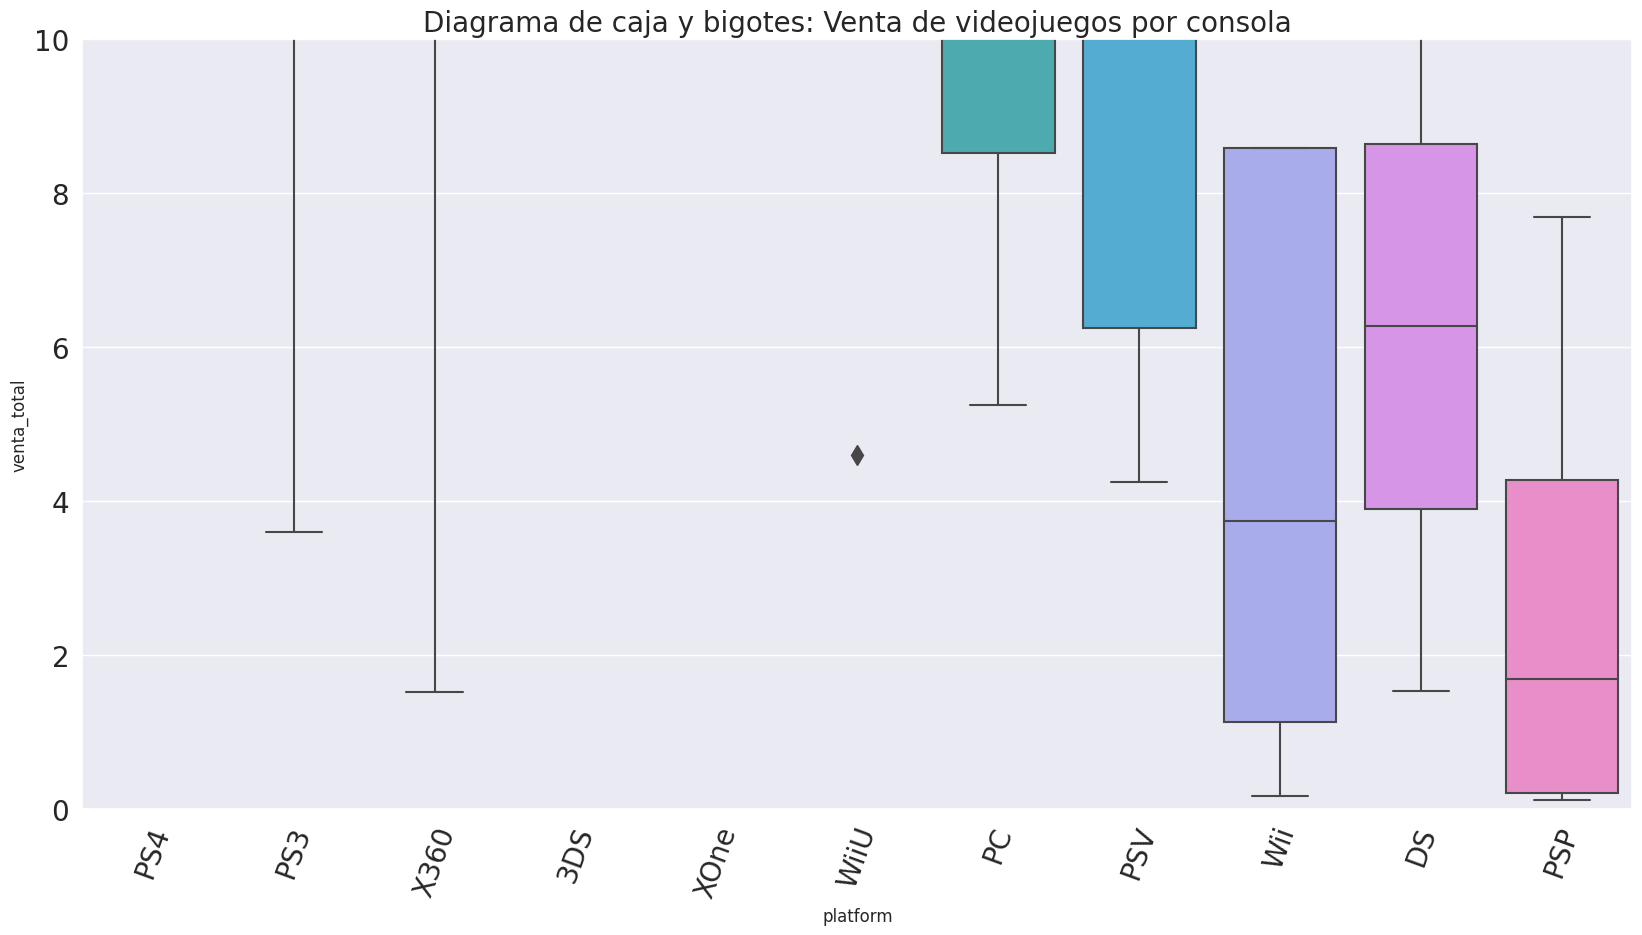

In [44]:
# Nueva tabla corregida por el Revisor
boxdata = box_plot_data[["platform", "venta_total"]]
platform_sales = boxdata.groupby("platform")["venta_total"].sum().sort_values(ascending=False)
plt.figure(figsize=(20, 10))
plt.ylim(0, 10)
plt.xticks(fontsize=20, rotation = "70")
plt.yticks(fontsize=20)
plt.title("Diagrama de caja y bigotes: Venta de videojuegos por consola", fontsize=20)
sns.boxplot(y="venta_total", x = "platform", data = boxdata, fliersize = 10, order = platform_sales.reset_index()["platform"])
plt.show()

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo con el desarrollo del box-plot. Solamente te recomiendo que como buen prática ordenemos los resultados para identificar mejor los resultados, dado que podría se confuso para los casos de las plataformas que tengan resultados muy similares. Te puedes guiar del siguiente ejemplo:
    
    boxdata = box_plot_data[["platform", "venta_total"]]
    platform_sales = boxdata.groupby("platform")["venta_total"].sum().sort_values(ascending=False)
    plt.figure(figsize=(20, 10))
    plt.ylim(0, 10)
    plt.xticks(fontsize=20, rotation = "70")
    plt.yticks(fontsize=20)
    plt.title("Diagrama de caja y bigotes: Venta de videojuegos por consola", fontsize=20)
    sns.boxplot(y="venta_total", x = "platform", data = boxdata, fliersize = 10, order = platform_sales.reset_index()["platform"])
    plt.show()
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo, solamente para visualizar todas las greaficas puedes ajustar el límite de y con plt.ylim(0,10)
</div>

Podemos apreciar en la distribución que las plataformas anteriores (PS3 y Xbox 360) fueron superadas por sus sucesoras que son la PS4 y Xbox One. Se nota a grandes rasgos el tiempo de vida de cada una de las antes mencionadas.

In [45]:
ps4 = clean_data.groupby(["platform", "name"])[["venta_total", "critic_score", "user_score"]].sum().query('platform == "PS4" & critic_score > 0 & user_score > 0').reset_index()

In [46]:
ps4

,platform,name,venta_total,critic_score,user_score
0,PS4,7 Days to Die,0.14,45.0,5.9
1,PS4,Adventure Time: Finn & Jake Investigations,0.10,68.0,7.0
2,PS4,Aegis of Earth: Protonovus Assault,0.02,57.0,7.8
3,PS4,Agatha Christie's The ABC Murders,0.02,67.0,6.2
4,PS4,Akiba's Trip: Undead & Undressed,0.11,68.0,7.0
...,...,...,...,...,...
387,PS4,Yakuza: Ishin,0.15,68.0,7.0
388,PS4,Yoru no Nai Kuni,0.08,68.0,7.0
389,PS4,ZombiU,0.06,68.0,7.0
390,PS4,Zombie Army Trilogy,0.20,62.0,6.8


In [47]:
ps4_corr_critic = ps4["venta_total"].corr(ps4["critic_score"])

In [48]:
print("Para la plataforma PS4, la correlación de sus ventas con el puntaje de la critica es de: ", ps4_corr_critic)

Para la plataforma PS4, la correlación de sus ventas con el puntaje de la critica es de:  0.3527177426809982


[Text(0.5, 1.0, 'Correlación de la plataforma PS4 en base a los puntajes de la critica')]

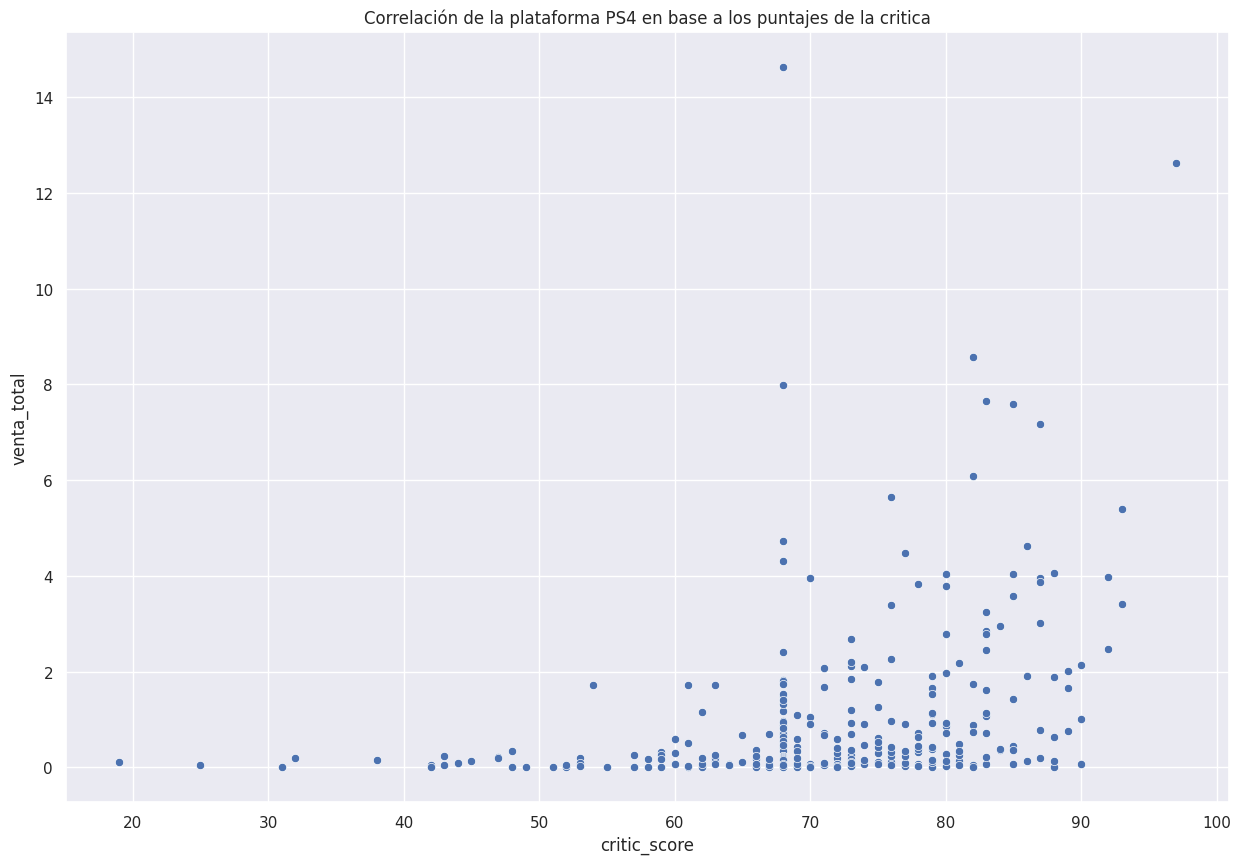

In [49]:
sns.scatterplot(data=ps4, x="critic_score", y="venta_total").set(title="Correlación de la plataforma PS4 en base a los puntajes de la critica")

En este grafico podemos apreciar que la correlación en base a los puntajes de la critica nos da positiva, eso quiere decir que mientras mayor sea el puntaje, más ventas tendra la plataforma del PS4.

In [50]:
ps4_corr_user = ps4["venta_total"].corr(ps4["user_score"])

In [51]:
print("Para la plataforma PS4, la correlación de sus ventas con el puntaje de los usuarios es de: ", ps4_corr_user)

Para la plataforma PS4, la correlación de sus ventas con el puntaje de los usuarios es de:  -0.039153543162937184


[Text(0.5, 1.0, 'Correlación de la plataforma PS4 en base a los puntajes de los usuarios')]

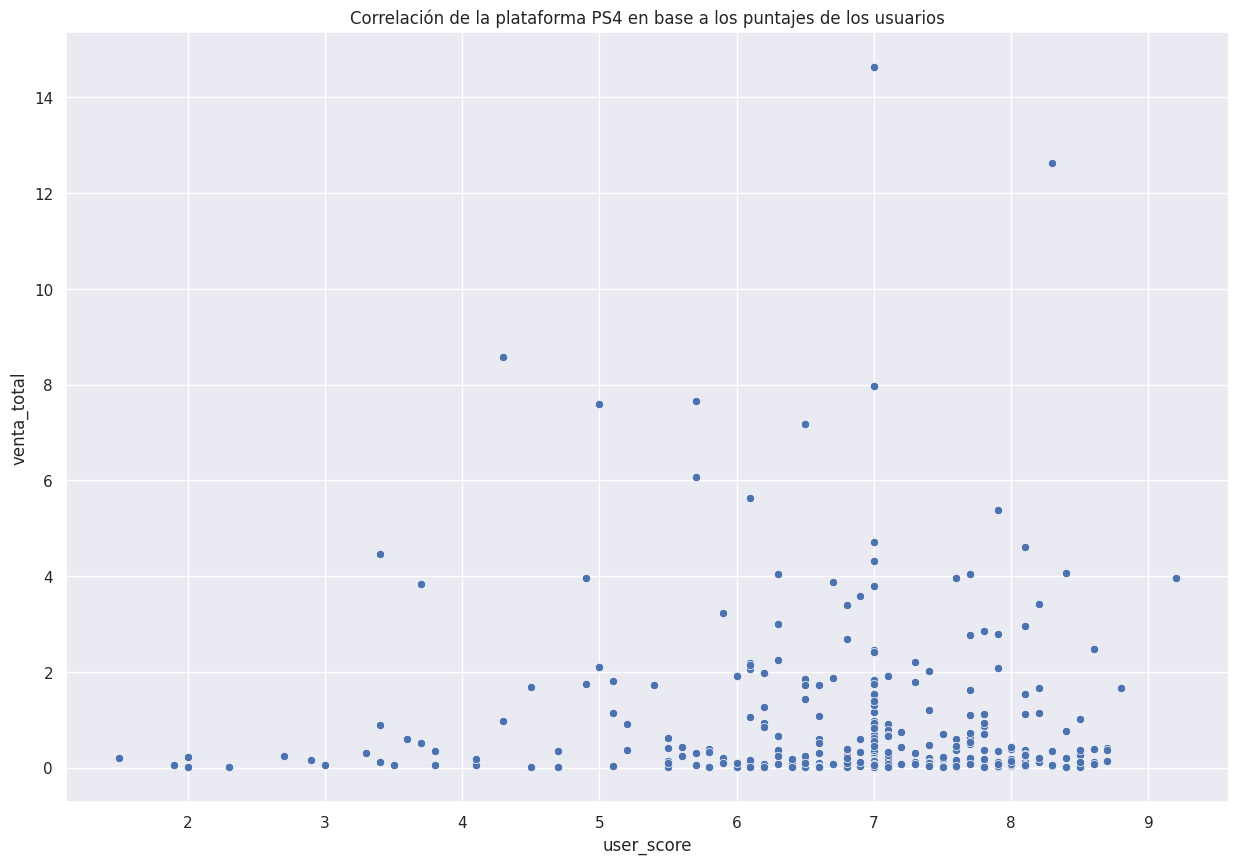

In [52]:
sns.scatterplot(data=ps4, x="user_score", y="venta_total").set(title="Correlación de la plataforma PS4 en base a los puntajes de los usuarios")

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el análisis de la relación estre las scores y las ventas. 
</div>

En cambio, en esta grafica de correlación, podemos apreciar que nos da negativa la correlación, practicamente en cero. Lo cual nos da a entender que el puntaje de los usuarios hace que las ventas caigan y no benefician las ventas de la plataforma de PS4.

In [53]:
# A continuación vamos a crear una formula que nos permita calcular la correlación de las diferentes plataformas
def correlacion(plataforma):
    data = clean_data[clean_data["platform"] == plataforma]
    
    corr = data[["critic_score", "user_score", "venta_total"]].corr()["venta_total"]
    
    data.plot(y="venta_total", x="critic_score", kind="scatter", color="green", grid=True)
    plt.title(plataforma)
    
    data.plot(y="venta_total", x="user_score", kind="scatter", color="red", grid=True)
    plt.title(plataforma)
    
    print(plataforma,"\n",corr)
    print("---------")

In [54]:
plataformas = ["PS4", "WiiU", "XOne", "PS3", "X360", "Wii"]

PS4 
 critic_score    0.352718
user_score     -0.039154
venta_total     1.000000
Name: venta_total, dtype: float64
---------
WiiU 
 critic_score    0.333084
user_score      0.356080
venta_total     1.000000
Name: venta_total, dtype: float64
---------
XOne 
 critic_score    0.375853
user_score     -0.083508
venta_total     1.000000
Name: venta_total, dtype: float64
---------
PS3 
 critic_score    0.345092
user_score     -0.046848
venta_total     1.000000
Name: venta_total, dtype: float64
---------
X360 
 critic_score    0.347647
user_score     -0.018165
venta_total     1.000000
Name: venta_total, dtype: float64
---------
Wii 
 critic_score    0.402196
user_score      0.008792
venta_total     1.000000
Name: venta_total, dtype: float64
---------


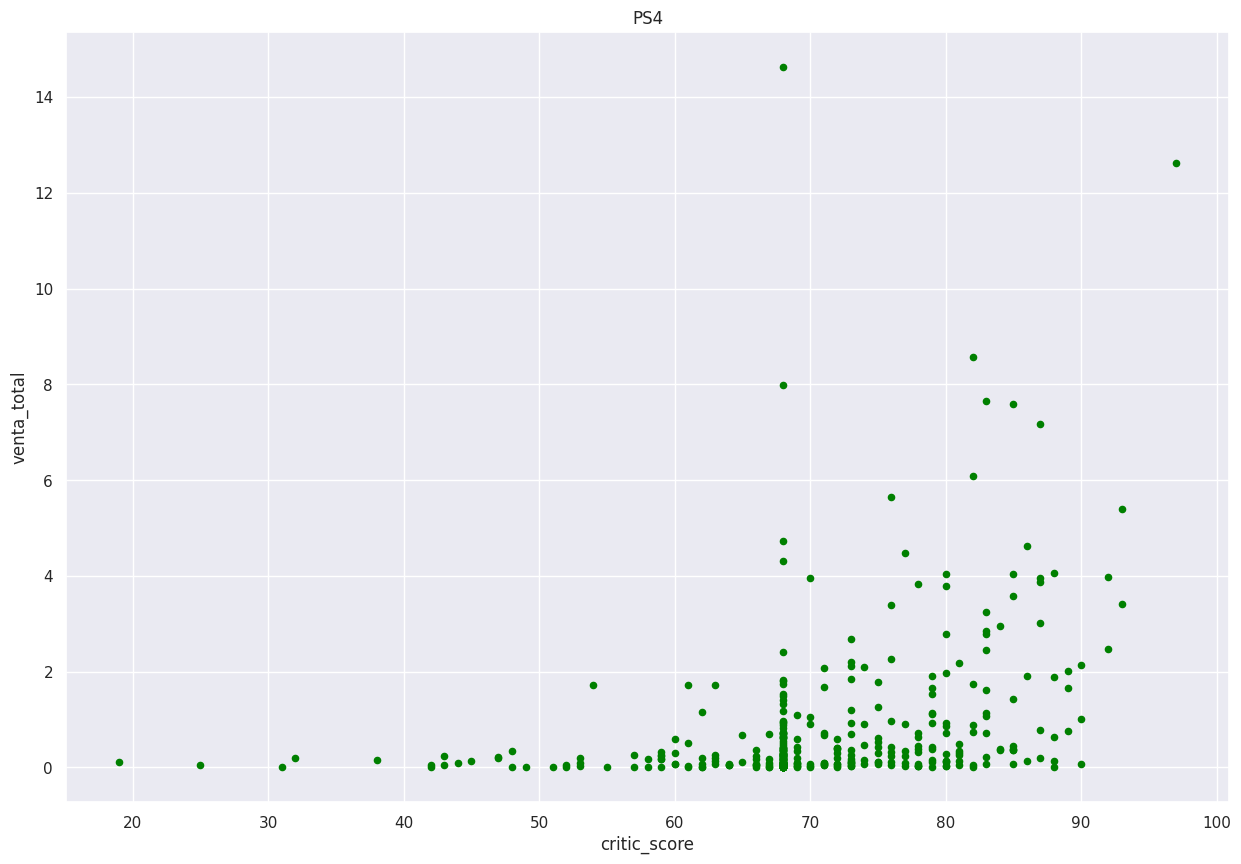

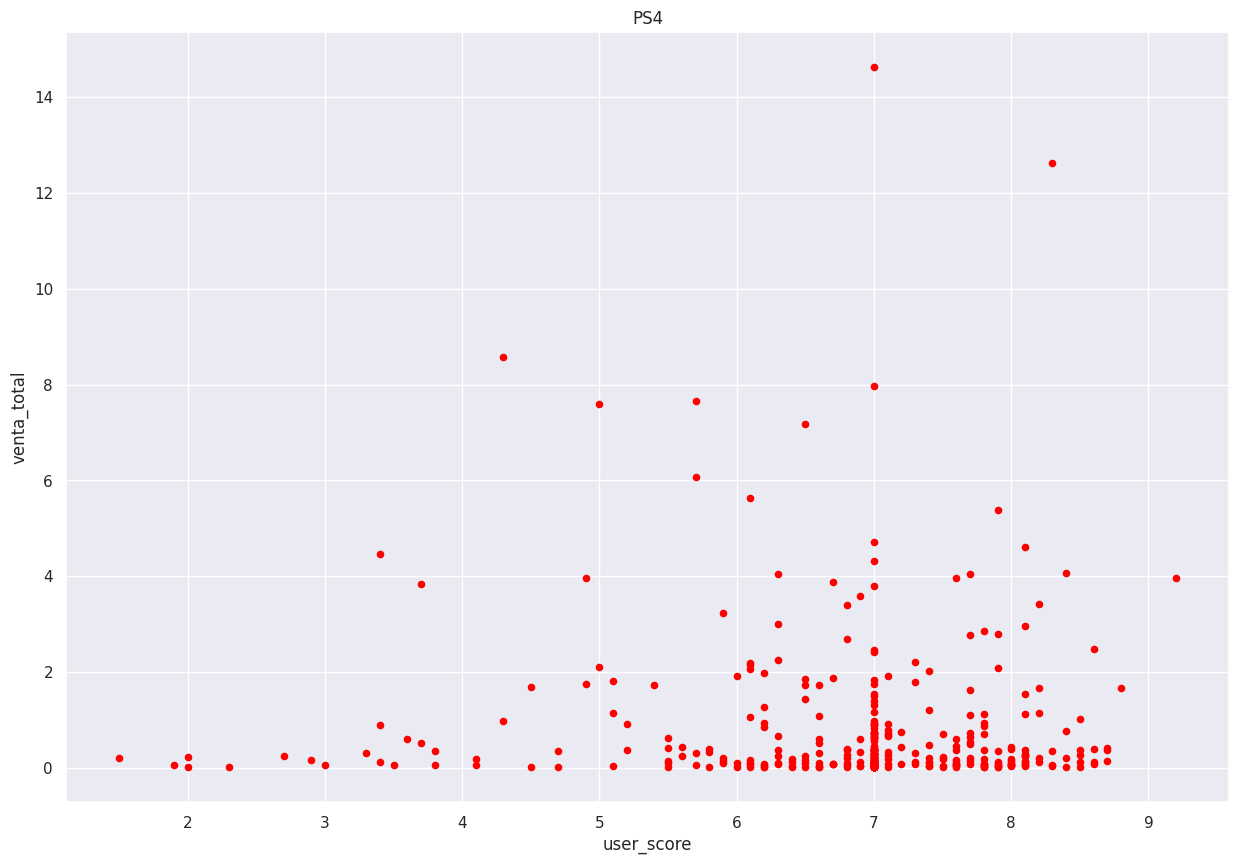

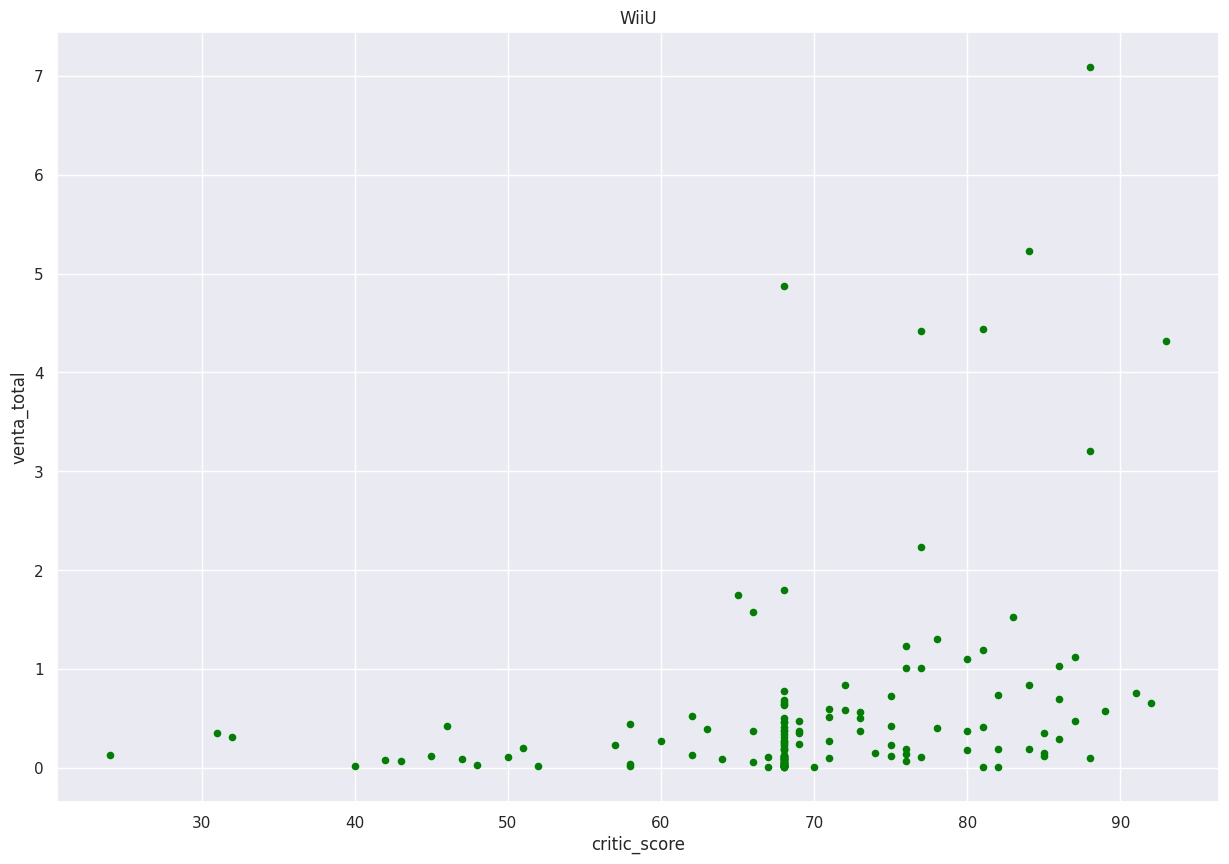

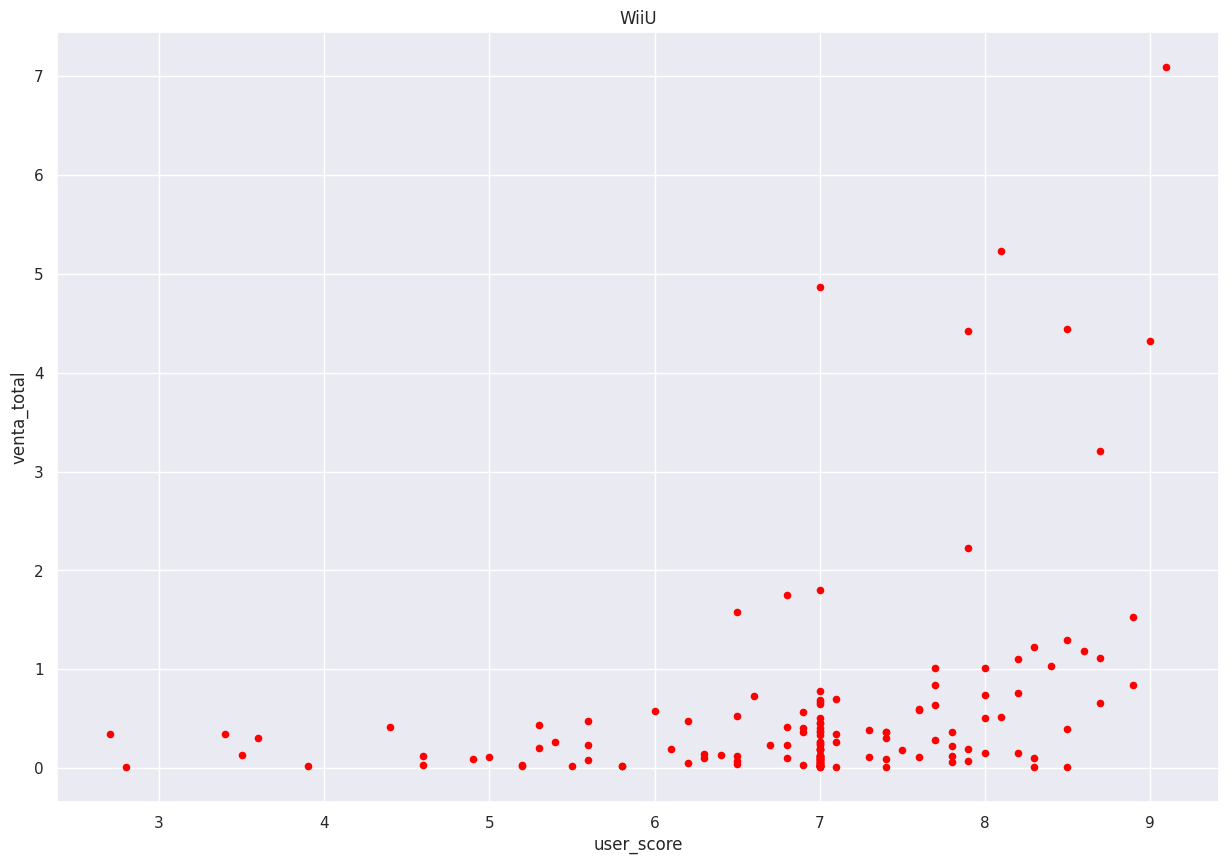

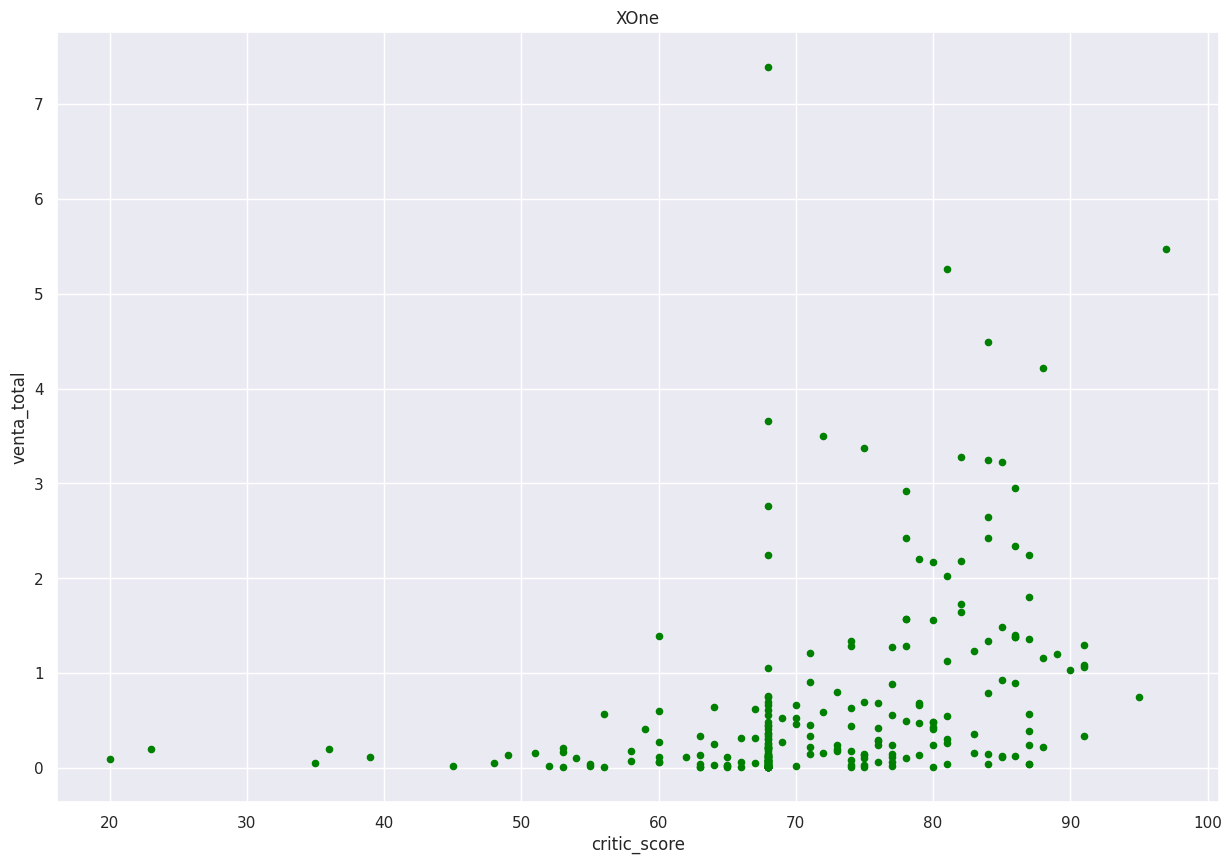

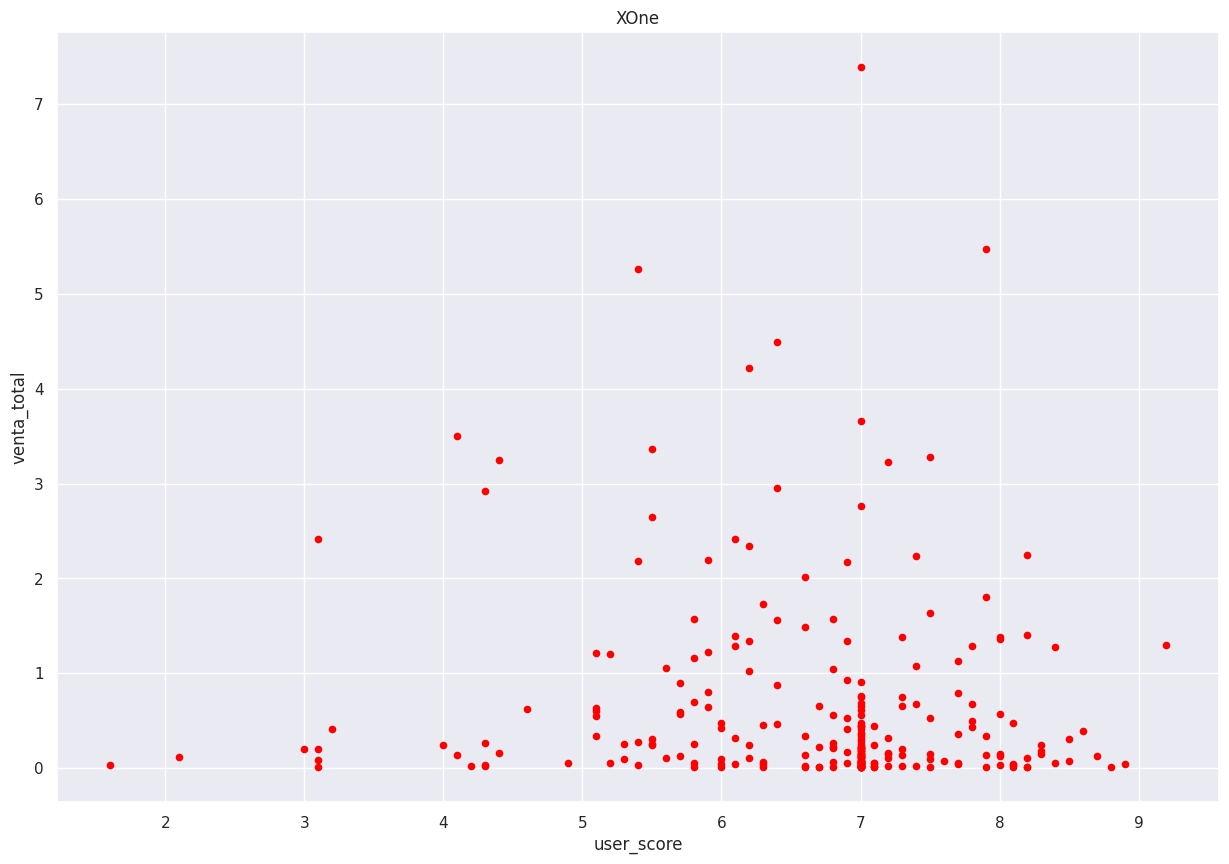

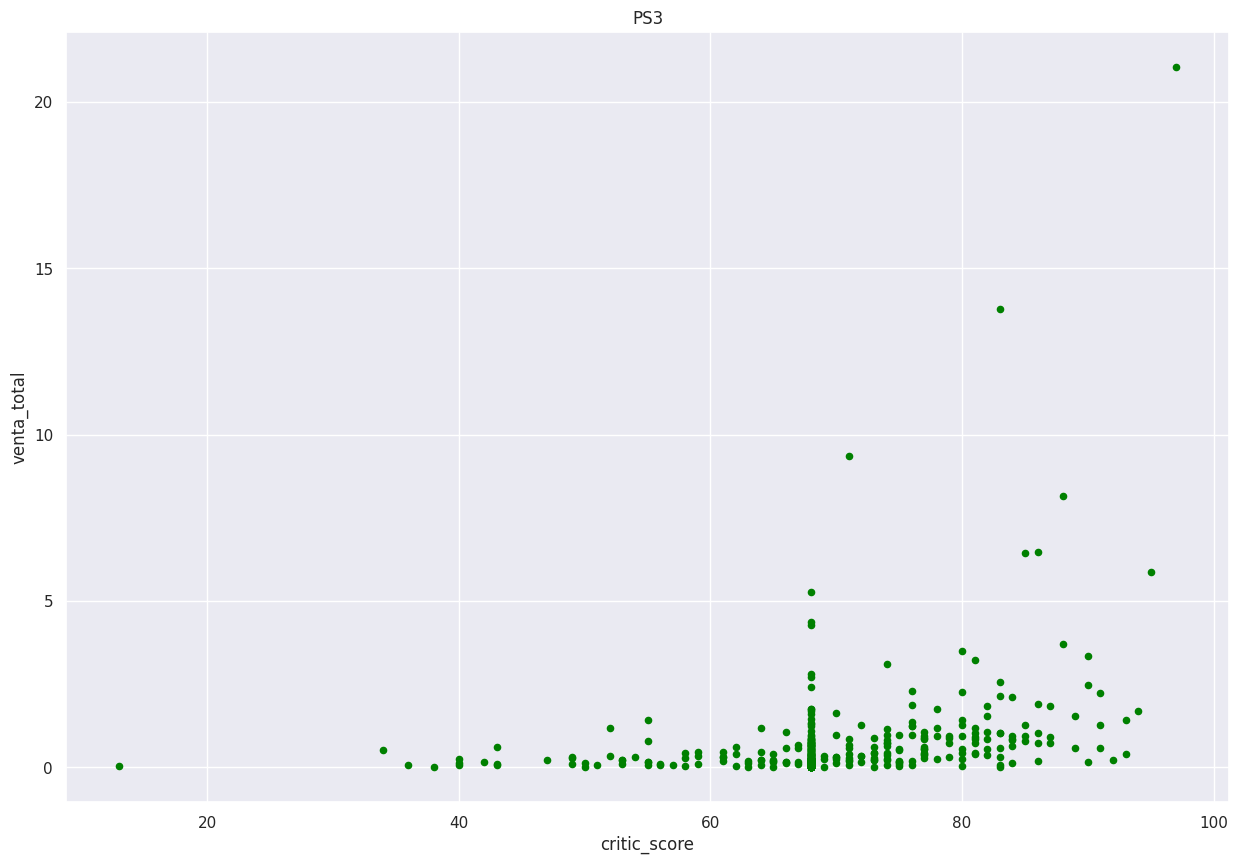

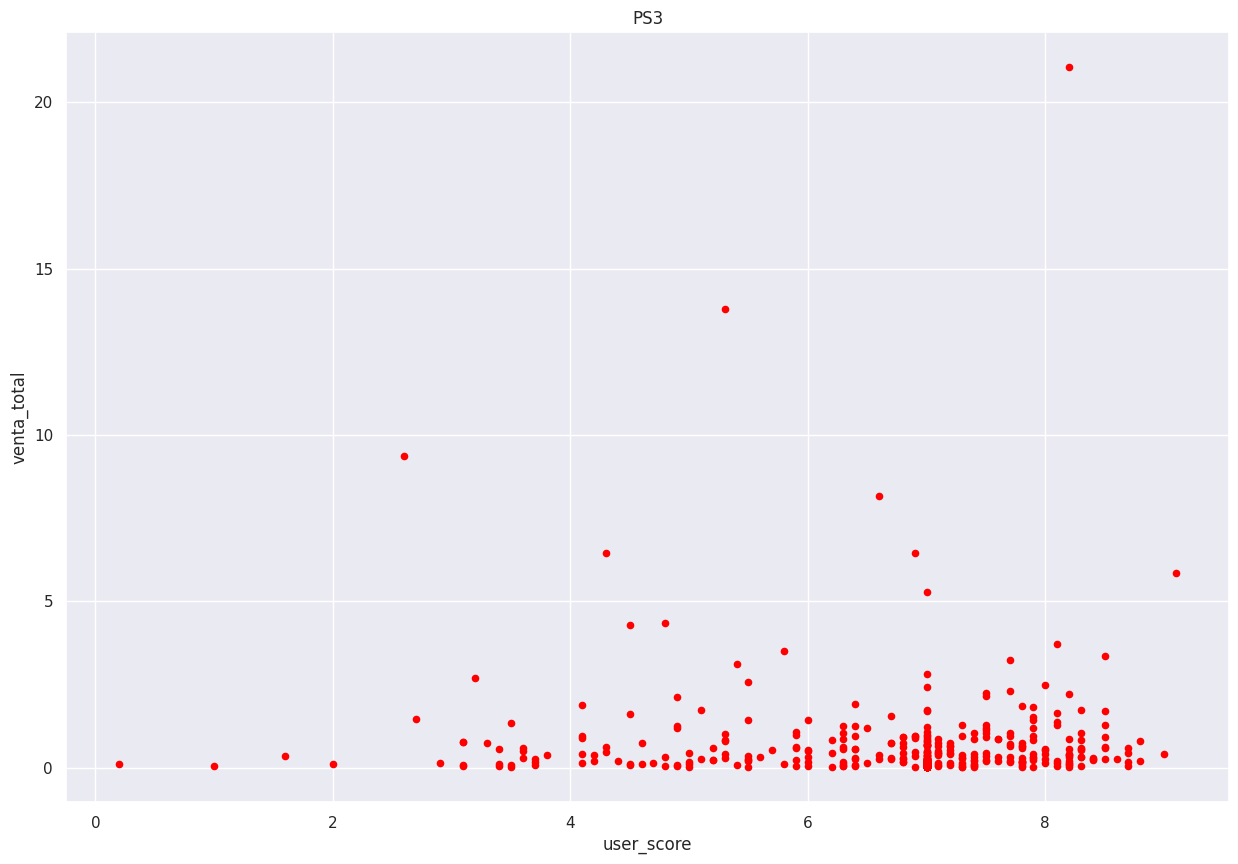

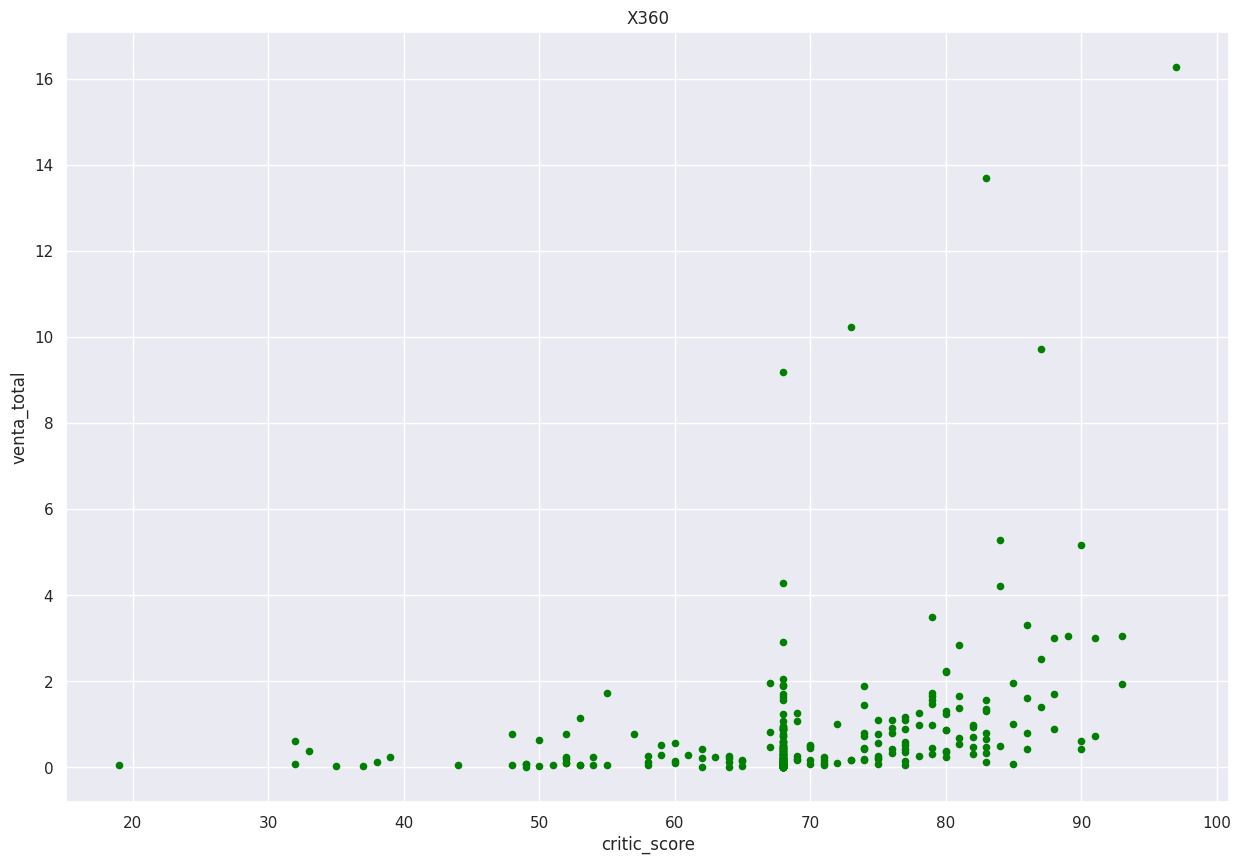

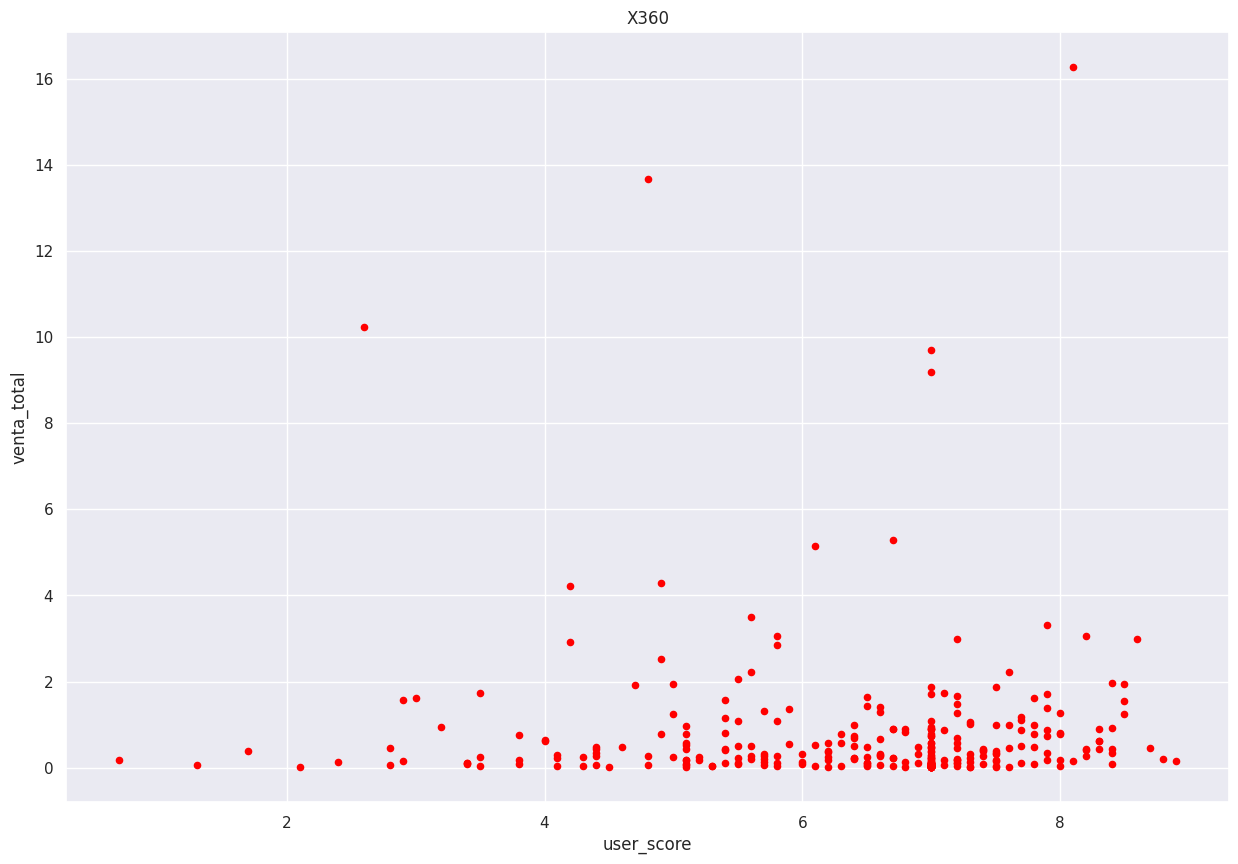

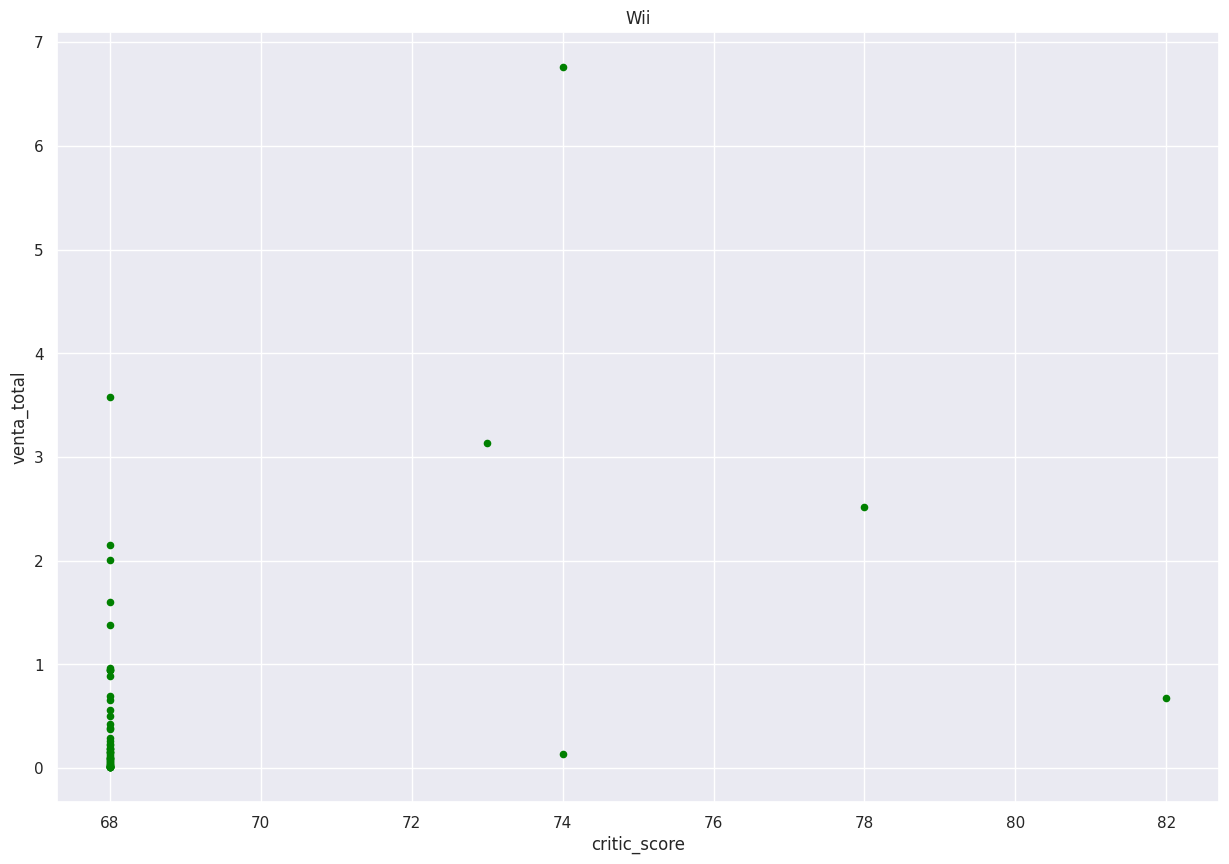

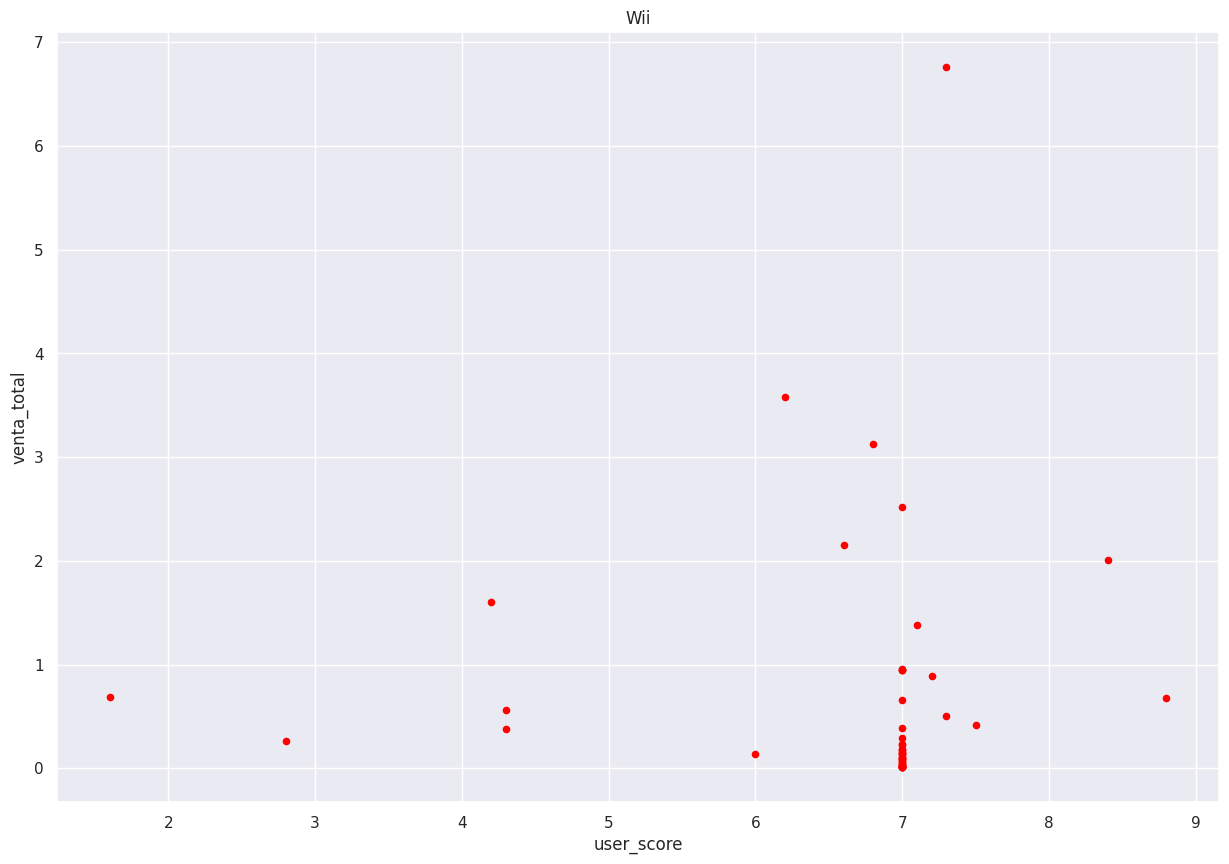

In [55]:
for plataforma in plataformas:
    correlacion(plataforma)

Mediante una formula, pudimos calcular la correlación de todas las plataformas en base a los puntajes de la critica y de los usuarios. En donde podemos apreciar que las plataformas de PS4 y Xone son muy queridas por los puntajes de la critica y la plataforma Wii es muy beneficiada y queria por los puntajes de los usuarios.

In [56]:
datos_group_genero = clean_data.groupby(["genre", "name"])["venta_total"].sum().reset_index()

In [57]:
datos_group_genero.query("1 < venta_total < 10", inplace=True)

[Text(0.5, 1.0, 'Los generos más vendidos')]

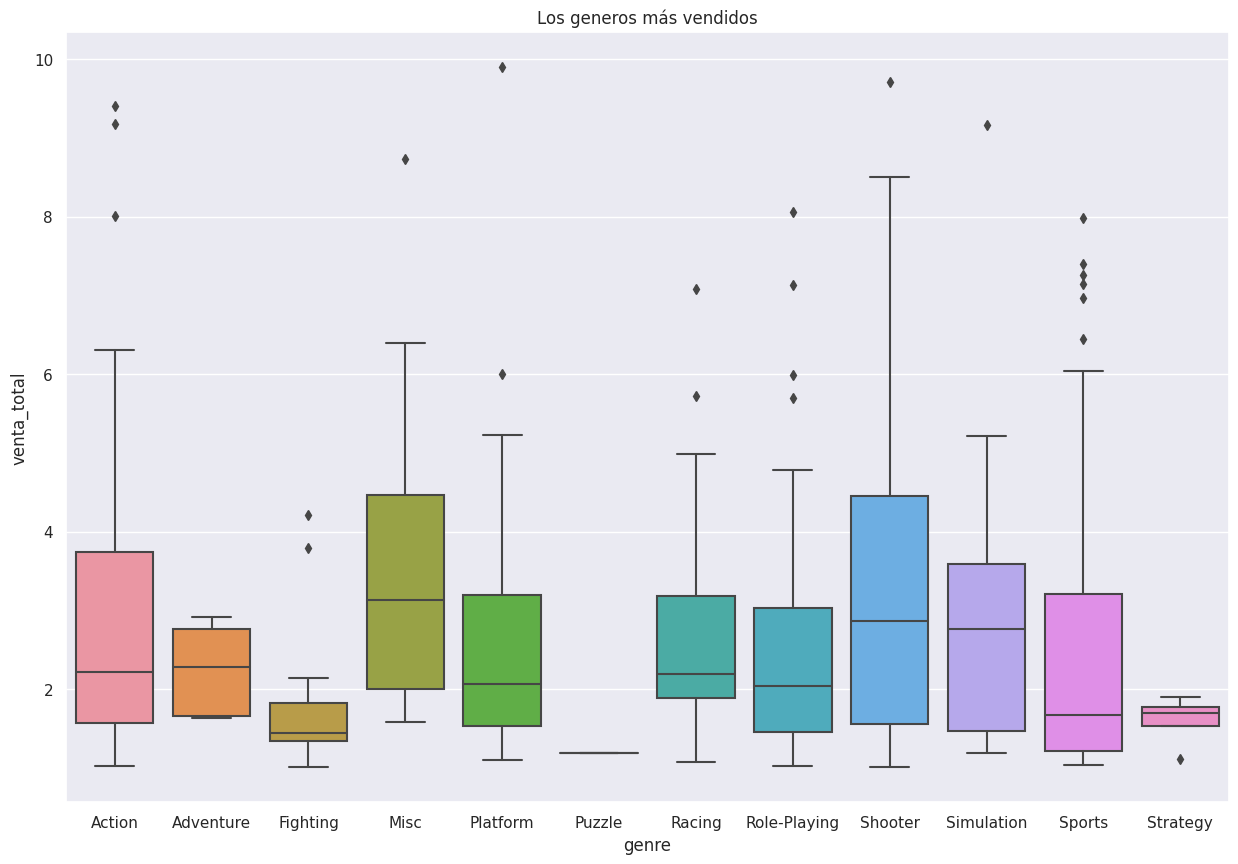

In [58]:
sns.boxplot(x="genre", y="venta_total", data=datos_group_genero).set(title="Los generos más vendidos")

Aqui podemos apreciar la distribución del genero con la venta total, en donde nos podemos dar cuenta que los Shooter y los Sports son de los generos más vendidos por los usuarios.

# <a id='toc6_'></a>[Paso 4. Crea un perfil de usuario para cada región](#toc6_)
**Para cada región (NA, EU, JP) determina:**

* Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
* Los cinco géneros principales. Explica la diferencia.
* Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [59]:
na_platform = clean_data.groupby("platform")["na_sales"].sum().reset_index().sort_values(by="na_sales", ascending=False)

In [60]:
na_platform.head()

,platform,na_sales
9,X360,140.05
4,PS4,108.74
3,PS3,103.38
10,XOne,93.12
0,3DS,55.31


In [61]:
na_platform.sum()

platform    X360PS4PS3XOne3DSWiiUPCWiiPSVDSPSP
na_sales                                590.97
dtype: object

In [62]:
na_platform["na_market_share"] = na_platform["na_sales"]*100/na_platform.sum()["na_sales"]

In [63]:
na_platform

,platform,na_sales,na_market_share
9,X360,140.05,23.698326
4,PS4,108.74,18.400257
3,PS3,103.38,17.493274
10,XOne,93.12,15.757145
0,3DS,55.31,9.359189
8,WiiU,38.10,6.447028
2,PC,19.12,3.235359
7,Wii,17.45,2.952773
6,PSV,10.98,1.857962
1,DS,4.59,0.776689


In [64]:
eu_platform = clean_data.groupby("platform")["eu_sales"].sum().reset_index().sort_values(by="eu_sales", ascending=False)

In [65]:
eu_platform.head()

,platform,eu_sales
4,PS4,141.09
3,PS3,106.86
9,X360,74.52
10,XOne,51.59
0,3DS,42.64


In [66]:
eu_platform["eu_market_share"] = eu_platform["eu_sales"]*100/eu_platform.sum()["eu_sales"]

In [67]:
eu_platform

,platform,eu_sales,eu_market_share
4,PS4,141.09,27.838286
3,PS3,106.86,21.084409
9,X360,74.52,14.703445
10,XOne,51.59,10.179156
0,3DS,42.64,8.413243
2,PC,37.76,7.450377
8,WiiU,25.13,4.958368
7,Wii,11.92,2.351920
6,PSV,11.36,2.241427
1,DS,3.53,0.696500


In [68]:
jp_platform = clean_data.groupby("platform")["jp_sales"].sum().reset_index().sort_values(by="jp_sales", ascending=False)

In [69]:
jp_platform.head()

,platform,jp_sales
0,3DS,87.79
3,PS3,35.29
6,PSV,21.04
4,PS4,15.96
8,WiiU,13.01


In [70]:
jp_platform["jp_market_share"] = jp_platform["jp_sales"]*100/jp_platform.sum()["jp_sales"]

In [71]:
jp_platform

,platform,jp_sales,jp_market_share
0,3DS,87.79,45.586250
3,PS3,35.29,18.324852
6,PSV,21.04,10.925330
4,PS4,15.96,8.287465
8,WiiU,13.01,6.755634
5,PSP,10.47,5.436702
1,DS,3.72,1.931665
7,Wii,3.39,1.760307
9,X360,1.57,0.815246
10,XOne,0.34,0.176550


En base a este análisis, voy a detallar el top 5 de plataformas de cada región:

   **Top 5 NA**
    - X360
    - PS4
    - PS3
    - XOne
    - 3DS
    
   **Top 5 EU**
    - PS4
    - PS3
    - X360
    - XOne
    - 3DS
    
   **Top 5 JP**
    - 3DS
    - PS3
    - PSV
    - PS4
    - WiiU

In [72]:
na_genre = clean_data.groupby("genre")["na_sales"].sum().reset_index().sort_values(by="na_sales", ascending=False)

In [73]:
na_genre.head()

,genre,na_sales
0,Action,177.84
8,Shooter,144.77
10,Sports,81.53
7,Role-Playing,64.00
3,Misc,38.19


In [74]:
eu_genre = clean_data.groupby("genre")["eu_sales"].sum().reset_index().sort_values(by="eu_sales", ascending=False)

In [75]:
eu_genre.head()

,genre,eu_sales
0,Action,159.34
8,Shooter,113.47
10,Sports,69.09
7,Role-Playing,48.53
6,Racing,27.29


In [76]:
jp_genre = clean_data.groupby("genre")["jp_sales"].sum().reset_index().sort_values(by="jp_sales", ascending=False)

In [77]:
jp_genre.head()

,genre,jp_sales
7,Role-Playing,65.44
0,Action,52.80
3,Misc,12.86
9,Simulation,10.41
2,Fighting,9.44


En base a este análisis, voy a detallar el top 5 de generos de cada región:

   **Top 5 NA**
    - Action
    - Shooter
    - Sports
    - Role-Playing
    - Misc
    
   **Top 5 EU**
    - Action
    - Shooter
    - Sports
    - Role-Playing
    - Racing
    
   **Top 5 JP**
    - Role-Playing
    - Action
    - Misc
    - Simulation
    - Fighting
    
Se puede apreciar como es muy jugado el genero de Action y Shooter en donde tanto NA y EU lo tienen muy alto en su top. En cambio JP es muy diferente y unico en el tipo de genero que juegan sus usarios.

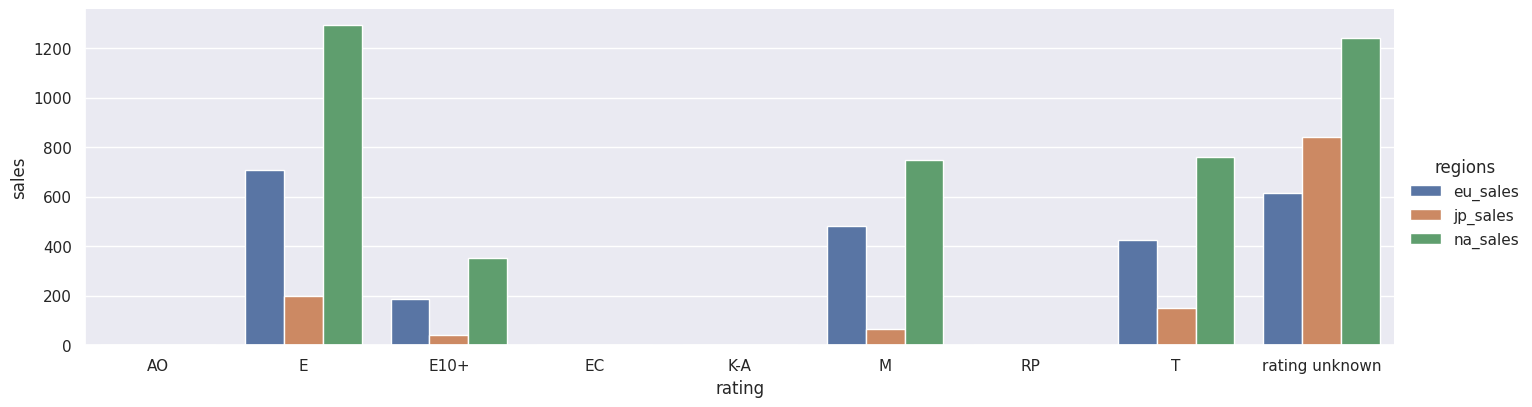

In [78]:
# Ahora para saber si las clasificaciones ESRB afectan las ventas individuales de cada region, vamos a crear un grafico 
rating_by_region = pd.melt(
    df_games[['rating','na_sales','eu_sales','jp_sales']],
      id_vars=['rating'], var_name= 'regions',
      value_vars=['na_sales','eu_sales','jp_sales'], value_name= 'sales'
      ).groupby(['rating','regions']).sum().reset_index()


sns.catplot(
    data= rating_by_region,
    x='rating',
    y='sales',
    hue='regions',
    kind='bar',
    height=4,
    aspect=3.5
)

plt.show()

Podemos apreciar que NA destaca en las diferentes clasificaciones de sus juegos, lo cual nos da a entender que existen muchos usuarios activos en esa región. En cambio JP se encuentra muy abajo, ya que tiene usuarios más especificos en cuestión del tipo de juego que adquieren sin importar la clasificación que le den.

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente! Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones.   

</div>

# <a id='toc7_'></a>[Paso 5. Prueba las siguientes hipótesis](#toc7_)
* Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

* Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

**Establece tu mismo el valor de umbral alfa.**

Explica:

* Cómo formulaste las hipótesis nula y alternativa.

* Qué criterio utilizaste para probar las hipótesis y por qué.

In [79]:
final_clean_data = clean_data.dropna()

In [80]:
#Vamos a realizar una prueba de Levene antes de realizar las pruebas de hipotesis

# Definimos el alpha
alpha = 0.05

# De ahi realizamos la prueba de Levene
XOne_array = final_clean_data.loc[final_clean_data.platform == 'XOne']['user_score'].values
PC_array = final_clean_data.loc[final_clean_data.platform == 'PC']['user_score'].values

results = st.levene(XOne_array,PC_array)

# Finalmente imprimimos el pvalue y el resultado de la prueba
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('Las varianzas son estadisticamente diferentes')
else:
    print("No podemos afirmar que las varianzas son estadisticamente diferentes")

p-value:  0.0020803165647031536
Las varianzas son estadisticamente diferentes


In [81]:
# Vamos a probar la primera hipotesis

alpha = 0.05

XOne_array = final_clean_data.loc[final_clean_data.platform == 'XOne']['user_score'].values
PC_array = final_clean_data.loc[final_clean_data.platform == 'PC']['user_score'].values

results = st.ttest_ind(XOne_array, PC_array, equal_var=False)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('Rechazamos la hipótesis nula')
else:
    print("No rechazamos la hipótesis nula")

p-value:  0.3379157256732769
No rechazamos la hipótesis nula


Al no rechazar la hipotesis nula, podemos determinar que las calificaciones promedio de los usuarios tanto de Xbox como de PC son muy parecidos, a tal grado que puede considerarse como un competidor directo.

In [82]:
#Vamos a realizar una prueba de Levene antes de realizar las pruebas de hipotesis

# Definimos el alpha
alpha = 0.05

# De ahi realizamos la prueba de Levene
results = st.levene(final_clean_data.loc[final_clean_data.genre == 'Action']['user_score'],final_clean_data.loc[final_clean_data.genre == 'Sports']['user_score'])

# Finalmente imprimimos el pvalue y el resultado de la prueba
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('Las varianzas son estadisticamente diferentes')
else:
    print("No podemos afirmar que las varianzas son estadisticamente diferentes")

p-value:  4.319278951587371e-29
Las varianzas son estadisticamente diferentes


In [83]:
# Ahora, vamos a probar la segunda hipotesis
alpha = 0.05

Sports_array = final_clean_data.loc[final_clean_data.genre == 'Sports']['user_score'].values
Action_array = final_clean_data.loc[final_clean_data.genre == 'Action']['user_score'].values

results = st.ttest_ind(Sports_array, Action_array, equal_var=False)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('Rechazamos la hipótesis nula')
else:
    print("No rechazamos la hipótesis nula")

p-value:  2.3313063772680757e-20
Rechazamos la hipótesis nula


 <div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estas pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=False en la primera prueba y como True en la segunda. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(XOne_array['user_score'], PC_array['user_score'])
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con la prueba de levene, nos ayuda a mostrar el supuesto de las varianzas iguales en la prueba de igualdad de medias
</div>

Al rechazar la hipotesis nula, nos da a entender que las calificaciones del genero de Action y Sports por parte de los usuarios no son diferentes, lo cual nos dice que son muy parecidas y esto se muestra ya que pertenecen en el top 5 de generos más vendidos tanto en las regiones de NA como de EU.

# <a id='toc8_'></a>[Paso 6. Escribe una conclusión general](#toc8_)

**Conclusión:**
Me gustaria mencionar que fue un dataset muy interesante y complicado de trabajar para mi.
Fueron demasiados datos en donde desgraciadamente tenia muchos datos ausentes que se necesitaban limpiar, aunque en el caso de la clasificación considere mejor ponerle como Unknown a establecerle una yo.

Nos dimos cuenta que tanto NA y EU cuentan con gustos muy similares tanto en Plataformas como en Generos de vdeojuegos. Esto llama la atención ya que son un publico muy grande el cual coinciden en cuestión de gustos a la hora de comprar un videojuego famoso. Esto puede ser por el tema de YouTube el cual es una plataforma muy usada en esas regiones en donde ellos pueden ver videos relacionados a sus videojuegos favoritos y cuales les llama la atención a la hora de querer adquirirlos.

En cambio, la región de JP esta muy aparte de las demas regiones, ellos estan más enfocados en generos no muy comunes en donde ellos sienten mayor diversión a la hora de jugarlos. Las plataformas que destacan en JP son más que nada de Nintendo (Me imagino por que como tal Nintendo se fundo en JP) y ademas es más dificil que las demas plataformas lleguen a esa región por el tipo de limites que presenta dicha región.

El tema de las hipotesis me llamo la atención, ya que se cumplio una y la otra en cambio gano la alternativa.

Y por ultimo me gustaria agregar que aqui no predomina una plataforma o es mejor una plataforma que otra, si no más que nada son los videojuegos que se lanzan en cada una lo que hace que los usuarios los compren más y dependiendo de que plataforma sea ese videojuego sera la plataforma que domine y entre en el top del mercado.


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Javier, en general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

* Verificar que cuando llenamos variables con valores nulos los estamos comletando con valores que no sesgan nuestros resultados

*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    
*  Considerar desarrollar un análisis para comprobar los supuestos de la prueba de hipótesis (varianzas iguales)
    
</div>

<div class="alert alert-block alert-info">
<b>Buen dia, quedo corregido los puntos que me mencionas de manera adecuada. Cualquier cosa estoy al pendiente. Muchas gracias.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes, Javier! Sigue con el excelente trabajo!
</div>